# Preprocessing


In [45]:
import os
import pandas as pd
from pybliometrics.scopus import ScopusSearch, AbstractRetrieval, PlumXMetrics


In [2]:
# load in "Syllabus_info.csv" as a DataFrame
df = pd.read_csv("Syllabus_info.csv")


In [3]:
# create an empty DataFrame to store the search results
cogsci_df = pd.DataFrame()
not_found = []

for i in range(len(df)):
    search_article = ScopusSearch(f"DOI({df['DOI'][i]})", download=True)
    df_temp = pd.DataFrame(search_article.results)
    # add df_temp to cogsci_df
    cogsci_df = pd.concat([cogsci_df, df_temp])
    doi = df['DOI'][i]
    print(doi)
    if doi not in cogsci_df['doi'].values:
        # add the doi to a list of DOIs that were not found
        not_found.append(doi)
        print(f"Warning: {doi} not found in Scopus")

cogsci_df.head()



10.1162/106454699568700
10.1016/j.janxdis.2016.11.008
10.2307/2786545
10.1086/jar.33.4.3629752
10.1257/jep.11.1.127
10.48550/ARXIV.2210.03216
10.1080/00273171.2019.1614898
10.1038/30918
10.1111/j.1756-8765.2009.01028.x
10.1073/pnas.122653799
10.3390/fi8030031
10.1111/j.1439-0310.1997.tb00123.x
10.1371/journal.pone.0182133
10.1371/journal.pone.0038869
10.1126/science.286.5439.509
10.1016/j.jtbi.2015.06.031
10.1016/j.tpb.2013.10.004
10.1016/j.cognition.2016.11.012
10.1038/35065725
10.1073/pnas.0307752101
10.1126/science.1133755
10.1111/tops.12151
10.3389/frai.2020.00062
10.1016/j.jrp.2024.104468
10.1007/s10164-011-0305-x
10.1016/j.anbehav.2017.05.011
10.1371/journal.pcbi.1000782
10.1287/orsc.2015.0972
10.3758/s13428-022-01827-2
10.1016/j.socnet.2009.02.004
10.1016/j.cub.2022.08.008
10.1038/s41562-021-01106-8
10.1007/s00127-016-1319-z
10.1016/j.cresp.2023.100112
10.1038/s43586-021-00055-w
10.1038/s41598-024-52837-3
10.3938/jkps.64.341
10.1001/jamaoncol.2018.3395
10.1073/pnas.1518798113
10

,eid,doi,pii,pubmed_id,title,subtype,subtypeDescription,creator,afid,affilname,...,pageRange,description,authkeywords,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-0033084649,10.1162/106454699568700,None,10633572,A brief history of stigmergy,re,Review,Theraulaz G.,60030961;60008134,Santa Fe Institute;CNRS Centre National de la ...,...,97-116,Stigmergy is a class of mechanisms that mediat...,Coordination | Self-assembling | Self-organiza...,455,0,None,None,None,undefined,None
0,2-s2.0-85002194651,10.1016/j.janxdis.2016.11.008,S0887618516302419,27936411,A network analysis of DSM-5 posttraumatic stre...,ar,Article,Armour C.,60025063;60023695;60020730;60017994;60002483,KU Leuven;U.S. Department of Veterans Affairs;...,...,49-59,Objective Recent developments in psychometrics...,Depression | DSM-5 | Functioning | Network ana...,217,0,repositoryam,Green,ERC,647209,European Research Council
0,2-s2.0-0001350108,10.1257/jep.11.1.127,None,None,An Introduction to Applicable Game Theory,ar,Article,Gibbons R.,60116635;60020337,Cornell SC Johnson College of Business;Nationa...,...,127-149,None,None,117,1,repositoryam,Green,None,undefined,None
0,2-s2.0-85067660019,10.1080/00273171.2019.1614898,None,31179765,Bridge Centrality: A Network Approach to Under...,ar,Article,Jones P.J.,60014171;60006303,University of Waterloo;Harvard Faculty of Arts...,...,353-367,"Recently, researchers in clinical psychology h...",bridge nodes | comorbidity | Graph theory | ne...,474,0,None,None,None,undefined,None
0,2-s2.0-0032482432,10.1038/30918,None,9623998,Collective dynamics of 'small-world9 networks,ar,Article,Watts D.J.,60007776,Cornell University,...,440-442,Networks of coupled dynamical systems have bee...,None,32982,0,None,None,None,undefined,None


In [4]:
# remove rows with DOI values not in df['DOI']
cogsci_df = cogsci_df[cogsci_df['doi'].isin(df['DOI'])]

# append the "Course" column from df to cogsci_df based on the DOI values
cogsci_df = cogsci_df.merge(df[['DOI', 'Course']], left_on='doi', right_on='DOI', how='left')
# search_article = ScopusSearch('"Cognitive diversity promotes collective creativity: an agent-based simulation"', download=True)

# df = pd.DataFrame(search_article.results)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [5]:
# count the number of articles per course
course_counts = cogsci_df['Course'].value_counts()
print(course_counts)

Social and Cultural dynamics         56
Methods                              14
Perception & Action                   8
Introduction to cognitive science     8
Philosophy of Cognitive Science       8
Cognitive Neuroscience                5
Cognition and Communication           5
Applied Cognitive Science             4
Name: Course, dtype: int64


In [6]:
# save the DataFrame to a CSV file
cogsci_df.to_csv("cogsci_articles.csv", index=False)

# save the not_found list to a .csv file
pd.DataFrame(not_found, columns=['DOI']).to_csv("not_found.csv", index=False)

In [7]:
# load in the failed_doi.csv file as a DataFrame
failed_df = pd.read_csv("failed_doi.csv")

# load in the chapter_info.csv file as a DataFrame
chapter_df = pd.read_csv("chapter_info.csv")

# merge the "course" column from df to failed_df based on the DOI values
failed_df = failed_df.merge(df[['DOI', 'Course']], left_on='doi', right_on='DOI', how='left')

# remove rows with na values in the "Course" column
failed_df = failed_df.dropna(subset=['Course'])
# drop the "doi" column
failed_df = failed_df.drop(columns=['DOI'])
#rename the "author" to "creator"
failed_df = failed_df.rename(columns={'author': 'creator'})
# drop the "DOI" column in cogsci_df
cogsci_df = cogsci_df.drop(columns=['DOI'])
#rename the "description" to "abstract"
cogsci_df = cogsci_df.rename(columns={'description': 'abstract'})

# combine the two DataFrames
final_df = pd.concat([cogsci_df, failed_df])

# rename the "Author" column to "creator" in chapter_df
chapter_df = chapter_df.rename(columns={'Author': 'creator'})

# rename the "chapter" to "title" in chapter_df
chapter_df = chapter_df.rename(columns={'Chapter': 'title'})

# rename the "summary" to "abstract" in chapter_df
chapter_df = chapter_df.rename(columns={'Summary': 'abstract'})

# combine the final_df with chapter_df
final_df = pd.concat([final_df, chapter_df])


Index(['eid', 'doi', 'pii', 'pubmed_id', 'title', 'subtype',
       'subtypeDescription', 'creator', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'coverDate',
       'coverDisplayDate', 'publicationName', 'issn', 'source_id', 'eIssn',
       'aggregationType', 'volume', 'issueIdentifier', 'article_number',
       'pageRange', 'abstract', 'authkeywords', 'citedby_count', 'openaccess',
       'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor',
       'Course', 'Book'],
      dtype='object')


<Axes: ylabel='Frequency'>

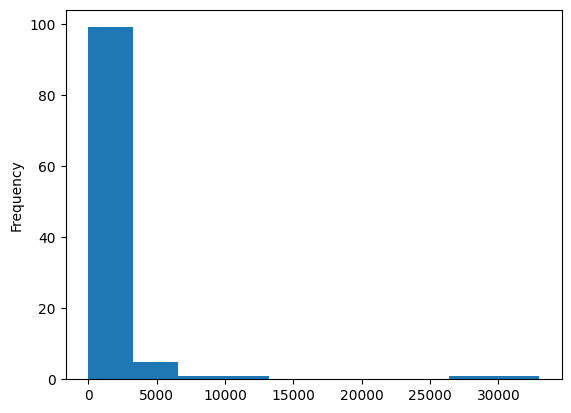

In [8]:
# print column names    
print(final_df.columns)

# plot the cited_by_count column
final_df['citedby_count'].plot(kind='hist')

# columns to keep: doi, title, creator, publicationName, affliation_country, abstract, authkeywords, citedby_count, Course
#final_df = final_df[['doi', 'title', 'creator', 'publicationName', 'affiliation_country', 'abstract', 'authkeywords', 'citedby_count', 'Course']]

In [9]:
# save the final_df to a CSV file called "data_merged.csv"
final_df.to_csv("data_merged.csv", index=False)

# Analysis

In [46]:
# load in "data_merged.csv" as a DataFrame called "data"
data = pd.read_csv("data_merged.csv")

In [47]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sentence_transformers import SentenceTransformer, util
import numpy as np


## Analysis of titles

In [48]:

# Load your data
#df = pd.read_csv('your_dataset.csv')  # Replace with your actual file path
texts = data['title'].astype(str).tolist()

# Preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

processed_texts = [preprocess_text(text) for text in texts]

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(processed_texts)


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [49]:

# Train the LDA model
lda = LatentDirichletAllocation(n_components=6, random_state=0)
lda.fit(dtm)

# Extract topics
def get_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[f"Topic {idx + 1}"] = [words[i] for i in topic.argsort()[-top_n:]]
    return topics

topics = get_topics(lda, vectorizer)

# Get representative sentences
def get_representative_sentences(texts, model, dtm, num_sentences=2):
    representative_sentences = {}
    topic_distributions = model.transform(dtm)
    for idx, topic_dist in enumerate(topic_distributions):
        topic = topic_dist.argmax()
        if f"Topic {topic + 1}" not in representative_sentences:
            representative_sentences[f"Topic {topic + 1}"] = [texts[idx]]
        elif len(representative_sentences[f"Topic {topic + 1}"]) < num_sentences:
            representative_sentences[f"Topic {topic + 1}"].append(texts[idx])
    return representative_sentences

representative_sentences = get_representative_sentences(texts, lda, dtm)

# Use BERT embeddings to name topics
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_topic_names(keywords, model, num_names=5):
    embeddings = model.encode(keywords, convert_to_tensor=True)
    centroid = embeddings.mean(dim=0)
    cos_similarities = util.pytorch_cos_sim(centroid, embeddings)
    closest_idxs = cos_similarities.argsort(descending=True).flatten()[:num_names]
    return [keywords[idx] for idx in closest_idxs]

topic_names = {}
for topic, keywords in topics.items():
    topic_names[topic] = generate_topic_names(keywords, model, num_names=5)

# Generate results table
results = []
for topic, keywords in topics.items():
    results.append({
        'Topic': topic,
        'Topic Names': ', '.join(topic_names[topic]),
        'Keywords': ', '.join(keywords),
        'Representative Sentences': ' | '.join(representative_sentences[topic]),
    })

results_df = pd.DataFrame(results)
print(results_df)


     Topic                                        Topic Names  \
0  Topic 1  understanding, visual, introduction, data, models   
1  Topic 2       brain, language, neuroscience, study, social   
2  Topic 3  coordination, development, mechanism, making, ...   
3  Topic 4     culture, social, research, emotional, cultures   
4  Topic 5           theory, models, structure, using, issues   
5  Topic 6   science, psychology, emotion, evolution, control   

                                            Keywords  \
0  cognition, data, architecture, understanding, ...   
1  neuroscience, study, memory, language, linear,...   
2  development, spiders, making, physiological, m...   
3  cultures, culture, using, research, emotional,...   
4  models, structure, issues, significance, testi...   
5  science, emotion, investigation, mechanisms, c...   

                            Representative Sentences  
0  Bridge Centrality: A Network Approach to Under...  
1  A network analysis of DSM-5 posttrauma

## Analysis of abstracts

In [50]:
# creating a list of possible topics
au_cogsci_list = ['Psychology', 'Neuroscience', 'Artificial Intelligence and Computer Science', 'Linguistics', 'Philosophy', 'Anthropology']
topic_list = ['Psychology', 'Neuroscience', 'Artificial Intelligence', 'Computer Science', 'Linguistics', 'Philosophy', 'Anthropology', 'Education', 'Mathematics', 'Statistics']
extended_topic_list=topic_list+['Machine Learning', 'Evolution', 'Cognitive Modeling', 'Data Analysis', 'Economics', 'Sociology', 'Human-Computer Interaction', 'Biology', 'Evolutionary Biology', 'Medicine', 'Psychiatry', 'Neurology', 'Communication Studies']

### Preprocessing the data


In [51]:

# Load your data
# df = pd.read_csv('your_dataset.csv')  # Replace with your actual file path
texts = data['abstract'].astype(str).tolist()

# Preprocess the text data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

processed_texts = [preprocess_text(text) for text in texts]

# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(processed_texts)


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


### Training the model


In [52]:

# Train the LDA model
lda = LatentDirichletAllocation(n_components=6, random_state=0)
lda.fit(dtm)

# Extract topics
def get_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[f"Topic {idx + 1}"] = [words[i] for i in topic.argsort()[-top_n:]]
    return topics

topics = get_topics(lda, vectorizer)


### Getting topic names

In [53]:

# Get representative sentences
def get_representative_sentences(texts, model, dtm, num_sentences=3):
    representative_sentences = {}
    topic_distributions = model.transform(dtm)
    for idx, topic_dist in enumerate(topic_distributions):
        topic = topic_dist.argmax()
        if f"Topic {topic + 1}" not in representative_sentences:
            representative_sentences[f"Topic {topic + 1}"] = [texts[idx]]
        elif len(representative_sentences[f"Topic {topic + 1}"]) < num_sentences:
            representative_sentences[f"Topic {topic + 1}"].append(texts[idx])
    return representative_sentences

representative_sentences = get_representative_sentences(texts, lda, dtm)

# Use BERT embeddings to name topics
model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_topic_names(keywords, representative_sentences, model, num_names=5):
    combined_text = keywords + representative_sentences
    embeddings = model.encode(combined_text, convert_to_tensor=True)
    centroid = embeddings.mean(dim=0)
    cos_similarities = util.pytorch_cos_sim(centroid, embeddings)
    closest_idxs = cos_similarities.argsort(descending=True).flatten()[:num_names]
    return [combined_text[idx] for idx in closest_idxs]

# Ensure unique topic names
def ensure_unique_names(topic_names):
    seen = set()
    unique_names = []
    for names in topic_names:
        for name in names:
            if name not in seen:
                seen.add(name)
                unique_names.append(name)
                break
    return unique_names

topic_names = {}
for topic, keywords in topics.items():
    representative_text = ' '.join(representative_sentences[topic])
    topic_names[topic] = generate_topic_names(keywords, [representative_text], model, num_names=5)

unique_topic_names = ensure_unique_names(topic_names.values())

# Generate results table
results = []
for i, (topic, keywords) in enumerate(topics.items()):
    results.append({
        'Topic': topic,
        'Topic Names': ', '.join(topic_names[topic]),
        'Unique Topic Name': unique_topic_names[i],
        'Keywords': ', '.join(keywords),
        'Representative Sentences': ' | '.join(representative_sentences[topic]),
    })

results_df = pd.DataFrame(results)
print(results_df)



     Topic                                   Topic Names Unique Topic Name  \
0  Topic 1       models, model, analysis, data, language            models   
1  Topic 2  networks, network, systems, learning, models          networks   
2  Topic 3       networks, network, web, systems, visual           network   
3  Topic 4       activity, action, control, brain, motor          activity   
4  Topic 5  emotion, emotional, brain, cognitive, social           emotion   
5  Topic 6      model, models, data, regression, network             model   

                                            Keywords  \
0  analysis, methods, network, model, models, bas...   
1  systems, interactions, network, silk, synaptic...   
2  memory, network, chapter, web, human, networks...   
3  chapter, activity, control, human, posterior, ...   
4  emotion, research, individuals, cognitive, emo...   
5  used, regression, psychology, network, distrib...   

                            Representative Sentences  
0  In

### Comparing topic similarity to predefined topics 

In [59]:
# Function to calculate similarity scores for a topic list
def calculate_similarity_scores(topic_list, representative_sentences, model):
    scores = []
    for topic in topic_list:
        topic_embedding = model.encode(topic, convert_to_tensor=True)
        topic_scores = []
        for sentence_list in representative_sentences.values():
            for sentence in sentence_list:
                sentence_embedding = model.encode(sentence, convert_to_tensor=True).unsqueeze(0)  # Ensure sentence_embedding is 2D
                score = util.pytorch_cos_sim(topic_embedding, sentence_embedding).item()
                topic_scores.append(score)
        avg_score = np.mean(topic_scores)
        scores.append((topic, avg_score))
    return scores

# Calculate similarity scores for each topic list
au_cogsci_scores = calculate_similarity_scores(au_cogsci_list, representative_sentences, model)
topic_list_scores = calculate_similarity_scores(topic_list, representative_sentences, model)
extended_topic_list_scores = calculate_similarity_scores(extended_topic_list, representative_sentences, model)

# Function to get top N topics by similarity score
def get_top_n_topics(scores, n=6):
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    return sorted_scores[:n]

# Get top 6 topics for each list
top_au_cogsci = get_top_n_topics(au_cogsci_scores)
top_topic_list = get_top_n_topics(topic_list_scores)
top_extended_topic_list = get_top_n_topics(extended_topic_list_scores)

# Print top 6 topics for each list
print("Top 6 topics for au_cogsci_list:")
for topic, score in top_au_cogsci:
    print(f"{topic}: {score}")

print("\nTop 6 topics for topic_list:")
for topic, score in top_topic_list:
    print(f"{topic}: {score}")

print("\nTop 6 topics for extended_topic_list:")
for topic, score in top_extended_topic_list:
    print(f"{topic}: {score}")

# get top 8 topics for each list
#top_au_cogsci = get_top_n_topics(au_cogsci_scores) # we are not doing this with this list as it only has 6 topics
top_topic_list = get_top_n_topics(topic_list_scores, n=8)
top_extended_topic_list = get_top_n_topics(extended_topic_list_scores, n=8)

# Print top 6 topics for each list
# print("Top 6 topics for au_cogsci_list:")
# for topic, score in top_au_cogsci:
#     print(f"{topic}: {score}")

print("\nTop 8 topics for topic_list:")
for topic, score in top_topic_list:
    print(f"{topic}: {score}")

print("\nTop 8 topics for extended_topic_list:")
for topic, score in top_extended_topic_list:
    print(f"{topic}: {score}")

Top 6 topics for au_cogsci_list:
Psychology: 0.18211833553181755
Anthropology: 0.165567917128404
Neuroscience: 0.1534990579303768
Artificial Intelligence and Computer Science: 0.14109236312409243
Linguistics: 0.1276591583672497
Philosophy: 0.10089628620901042

Top 6 topics for topic_list:
Psychology: 0.18211833553181755
Artificial Intelligence: 0.17907962270288003
Anthropology: 0.165567917128404
Neuroscience: 0.1534990579303768
Statistics: 0.14352865889668465
Linguistics: 0.1276591583672497

Top 6 topics for extended_topic_list:
Evolution: 0.23156890645623207
Cognitive Modeling: 0.22353496899207434
Evolutionary Biology: 0.20658495277166367
Sociology: 0.18235507607460022
Psychology: 0.18211833553181755
Artificial Intelligence: 0.17907962270288003

Top 8 topics for topic_list:
Psychology: 0.18211833553181755
Artificial Intelligence: 0.17907962270288003
Anthropology: 0.165567917128404
Neuroscience: 0.1534990579303768
Statistics: 0.14352865889668465
Linguistics: 0.1276591583672497
Mathemat